In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
# !pip install imbalanced-learn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [2]:
aita_url = "https://raw.githubusercontent.com/roualdes/data/master/aita_clean_really_lightweight.csv"
df = pd.read_csv(aita_url)
df["body"].fillna("", inplace = True)
df.head()

id   timestamp                                              title  \
0  arfcfl  1550365421                   AITA - Getting Hugged At The Bar   
1  cg8mxn  1563769917  AITA if i don't want to pay my friend 5 dollar...   
2  bajsje  1554663842  AITA For going to 'expensive' restaurants in s...   
3  cq6voc  1565771883  AITA for wanting "free gas", due to an attenda...   
4  bz4m2k  1560207411  AITA I asked my dad to replace the fuel that h...   

                                                body        edited  \
0   \n\nThis all happened less than an hour ago.\...         False   
1  So, my friend bought herself, our other friend...         False   
2  It's in Seattle if that matters. It seems peop...  1554686830.0   
3  I was with my dad and driving the family car w...  1565773989.0   
4  Am I the asshole for asking my dad to replace ...         False   

           verdict  score  num_comments  is_asshole  
0  not the asshole      3            14           0  
1          asshole     11            42           1  
2          asshole    657           397           1  
3  not the asshole     49            40           0  
4  not the asshole      4            10           0

In [61]:
N = np.shape(df)[0]
tfidf = TfidfVectorizer(
            sublinear_tf = True, 
            max_features = 10000,
            min_df = 5, 
            norm = 'l2', 
            encoding = 'latin-1', 
            ngram_range = (1,1), 
            stop_words = 'english')
X = tfidf.fit_transform(df["title"] + df["body"]).toarray()

In [93]:
Cs = np.logspace(-4, 4, 10)
Cs

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [100]:
logistic_model = LogisticRegression(max_iter = 500, warm_start = True)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3) # random_state = x for reproducibility
space = {"C": Cs}
search = GridSearchCV(logistic_model, space, 
                      scoring = "accuracy", n_jobs = -1, cv = cv)
result = search.fit(X, df["is_asshole"])

KeyboardInterrupt: 

In [95]:
pd.DataFrame(result.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
0       0.126092      0.016784         0.001807        0.000537       0.0001   
1       0.079534      0.009479         0.001485        0.000305     0.000774   
2       0.074089      0.011670         0.001757        0.000597     0.005995   
3       0.109246      0.014660         0.001726        0.000613     0.046416   
4       0.147334      0.023548         0.001608        0.000454     0.359381   
5       0.311057      0.044820         0.001941        0.000665     2.782559   
6       0.716228      0.111660         0.002089        0.000943    21.544347   
7       0.855515      0.107941         0.001840        0.000381   166.810054   
8       0.866000      0.112683         0.001639        0.000150  1291.549665   
9       0.803362      0.151550         0.001555        0.000289      10000.0   

                        params  split0_test_score  split1_test_score  \
0                {'C': 0.0001}               0.76               0.76   
1  {'C': 0.000774263682681127}               0.76               0.76   
2  {'C': 0.005994842503189409}               0.76               0.76   
3  {'C': 0.046415888336127774}               0.76               0.76   
4    {'C': 0.3593813663804626}               0.76               0.76   
5     {'C': 2.782559402207126}               0.77               0.76   
6     {'C': 21.54434690031882}               0.75               0.74   
7    {'C': 166.81005372000558}               0.73               0.76   
8    {'C': 1291.5496650148827}               0.70               0.75   
9               {'C': 10000.0}               0.70               0.76   

   split2_test_score  split3_test_score  ...  split23_test_score  \
0               0.76               0.76  ...                0.76   
1               0.76               0.76  ...                0.76   
2               0.76               0.76  ...                0.76   
3               0.76               0.76  ...                0.76   
4               0.76               0.76  ...                0.76   
5               0.75               0.76  ...                0.76   
6               0.70               0.74  ...                0.73   
7               0.70               0.71  ...                0.72   
8               0.69               0.70  ...                0.72   
9               0.69               0.70  ...                0.70   

   split24_test_score  split25_test_score  split26_test_score  \
0                0.76                0.76                0.75   
1                0.76                0.76                0.75   
2                0.76                0.76                0.75   
3                0.76                0.76                0.75   
4                0.76                0.76                0.75   
5                0.74                0.76                0.75   
6                0.74                0.74                0.72   
7                0.71                0.73                0.70   
8                0.71                0.71                0.70   
9                0.70                0.69                0.70   

   split27_test_score  split28_test_score  split29_test_score  \
0                0.75                0.75                0.75   
1                0.75                0.75                0.75   
2                0.75                0.75                0.75   
3                0.75                0.75                0.75   
4                0.75                0.75                0.75   
5                0.75                0.75                0.75   
6                0.70                0.73                0.70   
7                0.68                0.70                0.67   
8                0.67                0.69                0.66   
9                0.67                0.70                0.66   

   mean_test_score  std_test_score  rank_test_score  
0         0.756000        0.004899                1  
1         0.756000        0.004899      

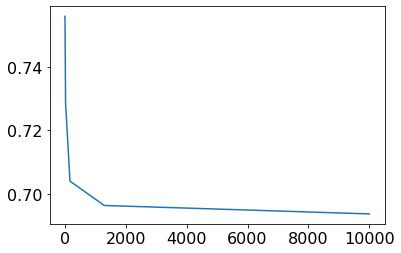

In [96]:
plt.plot(np.asarray(result.cv_results_["param_C"]), result.cv_results_["mean_test_score"])

In [81]:
result.best_score_

0.7560000000000002

In [82]:
result.best_estimator_

LogisticRegression(C=1e-16, max_iter=500)

In [89]:
cm = confusion_matrix(df["is_asshole"], result.predict(X))
cm / np.sum(cm)

array([[0.756, 0.   ],
       [0.244, 0.   ]])